# Project 1 for Introduction Of Neural Networks Subject (2023.1)

## Name: Gabriel Vicente Rodrigues
## NUSP: 11795377
## Email: gabriel_vr@usp.br

The objective of this project is to practice the concepts of neural networks and data science, train models with different hyper parameters and compare them over a dataset of bank transactions labeled as fraudulent or not.

The project is divide into 5 questions, each one inteded to practice for a specific topic of the subject.

## Initial Configurations

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.use_inf_as_na = True


In [8]:
# Reading datasets
trainDataset = pd.read_csv('train.csv')
testDataset = pd.read_csv('test.csv')

In [9]:
# Verifying if datasets have empty values
testDataset.isnull().values.any(), trainDataset.isnull().values.any()

(False, False)

In [10]:
# Separating the datasets into feature values and label values
y_train = trainDataset['Class']
X_train = trainDataset.drop(columns=['Class'])
y_test = testDataset['Class']
X_test = testDataset.drop(columns=['Class'])

In [11]:
stds = StandardScaler()
stds.fit(X_train)
X_test = stds.transform(X_test)
X_train = stds.transform(X_train)

## Question 1

### a) Which metric must be used to test the efficiency of the model: Accuracy or AUC?

In [12]:
#printing classes of the dataset
print(trainDataset['Class'].unique())

[0 1]


In [13]:
nFrauds = trainDataset['Class'].sum()
nNotFrauds = trainDataset['Class'].count() - nFrauds
print("Number of non fraudulent transactions (training dataset): ", nNotFrauds)
print("Number of fraudulent transactions (training dataset):", nFrauds)

Number of non fraudulent transactions (training dataset):  142135
Number of fraudulent transactions (training dataset): 269


<Axes: >

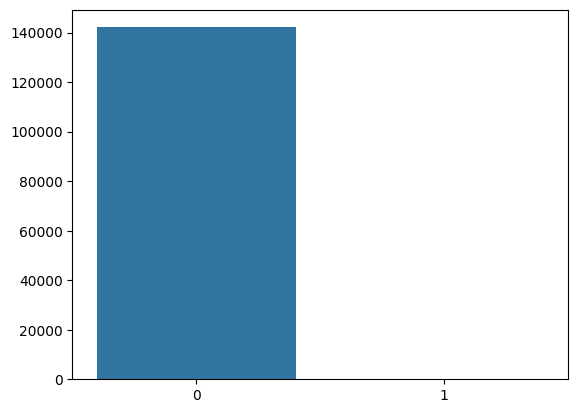

In [14]:
sns.barplot(x=[0, 1], y=[nNotFrauds, nFrauds])

The best metric to test the efficiency of the model is the AUC, because the classes have very different proportions.

### b) What would be the results of a random model, a model that label every test entry as fraudulent and another that label as not fraudulent, using both Accuracy and AUC

In [15]:
def accuracy(y_pred: pd.Series, y_test: pd.Series):
    return np.mean(y_pred == y_test)

def labelAsTrue(y_test: pd.Series):
    y_pred = np.ones((y_test.size), dtype=np.uint8)
    return pd.Series(y_pred)

def labelAsFalse(y_test: pd.Series):
    y_pred = np.zeros((y_test.size), dtype=np.uint8)
    return pd.Series(y_pred)

def labelRandomly(y_test: pd.Series):
    y_pred = np.random.choice([0, 1], (y_test.size))
    return pd.Series(y_pred)

* ####  Random
The random model would give an average accuracy and AUC of 50%. This is so because the random model would hit and miss for both classes.

In [16]:
np.mean(labelRandomly(y_test) == y_test), roc_auc_score(y_test, labelRandomly(y_test))

(0.5011481499687507, 0.5187136624010364)

* #### All Fraud
The model would give an accuracy of 0.1% because the result is the proportion between the fraudulent transactions and all the dataset. Meanwhile, the AUC would be of 50%, which is way better than the accuracy because it takes the true positive ratio (100%) and true negative ratio (0%) into account to calculate the score.

In [17]:
print(nFrauds/(nFrauds+nNotFrauds))
print(roc_auc_score(y_test, labelAsTrue(y_test)))

0.0018889918822504986
0.5


* #### All non fraud
The accuracy of this model would be almost perfect of about 99%, but this value just represents the proportion of the non fraudulent transactions with the dataset and that is why it is not a good metric to analize the model. The AUC would score the model with 50%, the same as the previous model, but now with the proportions inverted, with the true negative ratio as 0% and the true positive ratio as 100%.


In [18]:
print(nNotFrauds/(nFrauds+nNotFrauds))
print(roc_auc_score(y_test, labelAsFalse(y_test)))

0.9981110081177496
0.5


## Question 2

### Usign the MLPClassifier from sklearn, create the following architecture:
* 5 hidden Layers, each with 20 neurons
* ReLU as activation function
* Random state as 42

Train the model for alpha as 0, 0.01, 0.1, 1, 10 and compute their results in the testing data

In [19]:
def MLPClassifierWrapper(layers, random_state, alpha=0.0001)-> MLPClassifier:
    mlpc = MLPClassifier(layers, random_state=random_state, alpha=alpha, activation='relu')
    return mlpc



In [20]:
alphas = [0.0, 0.01, 0.1, 1, 10]
layers = [20, 20, 20, 20, 20]
results = []

for alpha in alphas:
    mlp = MLPClassifierWrapper(layers, 42, alpha)
    mlp.fit(X_train, y_train)
    results.append(roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))




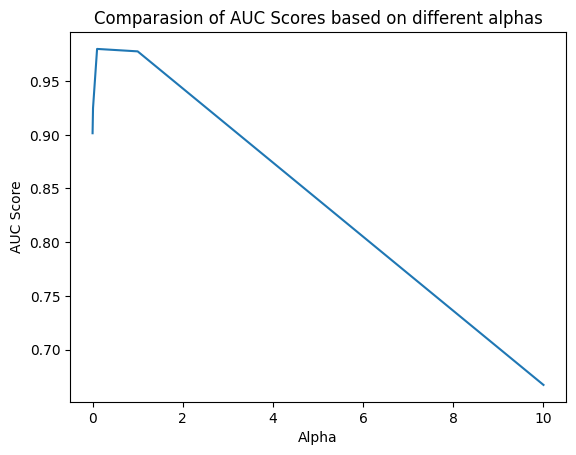

In [21]:
plt.title("Comparasion of AUC Scores based on different alphas")
plt.xlabel("Alpha")
plt.ylabel("AUC Score")
plt.plot(alphas, results)
plt.show()


The hyperparameter alpha tries to minimize the overfitting of the model, that happens when the model adapts to much to the training data but performs poorly on the testing data. As we can see in the graph, increasing the alpha up to 1 helps the model perform better, with an AUC score almost perfect.

But when we increase the alpha too much, we create another problem, the underfitting. It happens when the predictions of the model are too loose, not adapting to the training data neither to the testing data. This shows that an optimal value for alpha must be found to make the performance of our model better.

## Question 3

### Compare the following models
1. MLPClassifier:
    
    a. No hidden layers
    
    b. 1 hidden layer with 10 neurons
    
    c. 2 hidden layers with 5 neurons each

2. KNeighborsClassifier:
    
    a. k=3
    
    b. k=5
    
    c. k=7

The comparison must be done using the 3-fold cross validation method on the training data. The best architecture for the KNN and MLP must be used on the testing data.

In [22]:
parameters={
    'hidden_layer_sizes': [[], [10], [5, 5]]
}
mlp = MLPClassifier()
gsMlp = GridSearchCV(
    mlp,
    param_grid=parameters,
    cv=3,
    scoring='roc_auc'
)
gsMlp.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [[], [10], [5, 5]]},
             scoring='roc_auc')

In [23]:
print("The best parameters and score")
print(gsMlp.best_estimator_), print(gsMlp.best_score_)

The best parameters and score
MLPClassifier(hidden_layer_sizes=[10])
0.9504670067798485


(None, None)

In [24]:
%%time
roc_auc_score(y_test, gsMlp.predict_proba(X_test)[:, 1])

CPU times: user 201 ms, sys: 450 ms, total: 651 ms
Wall time: 108 ms


0.9440716845380737

In [25]:
parameters={
    'n_neighbors': [3, 5, 7]
}
knn = KNeighborsClassifier()
gsKnn = GridSearchCV(
    knn,
    param_grid=parameters,
    cv=3,
    scoring='roc_auc'
)
gsKnn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='roc_auc')

In [41]:
print("The best parameters and score")
print(gsKnn.best_params_)
print(gsKnn.best_score_)

The best parameters and score
{'n_neighbors': 5}
0.9088555253689791


In [27]:
%%time
roc_auc_score(y_test, gsKnn.predict_proba(X_test)[:, 1])


CPU times: user 2min 44s, sys: 1.81 s, total: 2min 46s
Wall time: 23.9 s


0.9075474340301279

### a) Which technique obtained the best results on the testing data

The best MLPClassifier architecture, with one hidden layer with 10 neurons, obtained an AUC score of about 94%, while the best KNNClassifier, with k equal to 5, obtained an AUC score of about 90%.

### b) Which technique takes the longest to generate the results

The KNNClassifier takes the longest time to generate the results, with a time of about 2 minutes and 46 seconds, while the MLPClassifier only takes about 0.6 seconds.

## Question 4

### Usign the best model from the previous question, calculate the profit that such model would bring in the following scenario:
* The to 1% transactions with higher chance of fraud would be stopped from happening
* Each fraud avoided would bring a profit of $100
* Each non fraud blocked would bring loss of $2

In [28]:
y_pred = gsMlp.predict_proba(X_test)

In [29]:
y_pred = y_pred[:, 1]

In [30]:
# Put the predicted probabilities and the real classes together to sort 
arrayPredictionsAndTrueClass = np.zeros((y_pred.size, 2), dtype=np.float64)
arrayPredictionsAndTrueClass[:, 0] = y_pred.reshape((-1,))
arrayPredictionsAndTrueClass[:, 1] = y_test
arrayPredictionsAndTrueClass

array([[5.85611634e-04, 0.00000000e+00],
       [9.97575609e-01, 1.00000000e+00],
       [4.83519403e-05, 0.00000000e+00],
       ...,
       [4.06481394e-07, 0.00000000e+00],
       [7.28677516e-05, 0.00000000e+00],
       [2.92670627e-04, 0.00000000e+00]])

In [31]:
# sort the values based on the first column
arrayPredictionsAndTrueClass = arrayPredictionsAndTrueClass[arrayPredictionsAndTrueClass[:, 0].argsort()[::-1]]

In [32]:
top1percent = int(arrayPredictionsAndTrueClass.shape[0]/100)
top1percent

1424

In [33]:
# set top 1% as fraud and the rest as non fraud
arrayPredictionsAndTrueClass[:top1percent, 0] = 1
arrayPredictionsAndTrueClass[top1percent:, 0] = 0
arrayPredictionsAndTrueClass = arrayPredictionsAndTrueClass.astype(np.uint8)

In [34]:
#pick the real class of the data predicted as fraud
labeledAsFraud= arrayPredictionsAndTrueClass[arrayPredictionsAndTrueClass[:, 0] == 1][:, 1]


In [35]:
profit = labeledAsFraud.sum() * 100
profit

18500.0

In [36]:
loss = (labeledAsFraud.shape[0] - labeledAsFraud.sum()) * 2
loss

2478.0

In [37]:
profit -= loss
profit

16022.0

<Axes: ylabel='Count'>

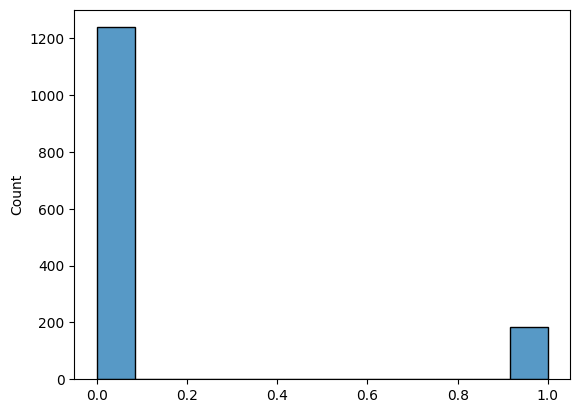

In [38]:
sns.histplot(labeledAsFraud)

The graph indicates the number of transactions labeled as fraud that were in fact fraud or that were non fraud. Almost over 1200 transactions were labeled as fraud but were not, while almost 200 transactions were labeled correctly. 

This approach would bring a profit of $16022.

## Question 5

### Use a neural network with no hidden layers and one output neuron to find the features that are not relevant to the problem

In [39]:
sgd = SGDClassifier(loss='log', random_state=42)

sgd.fit(X_train, y_train)

/home/gabriel_vr/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

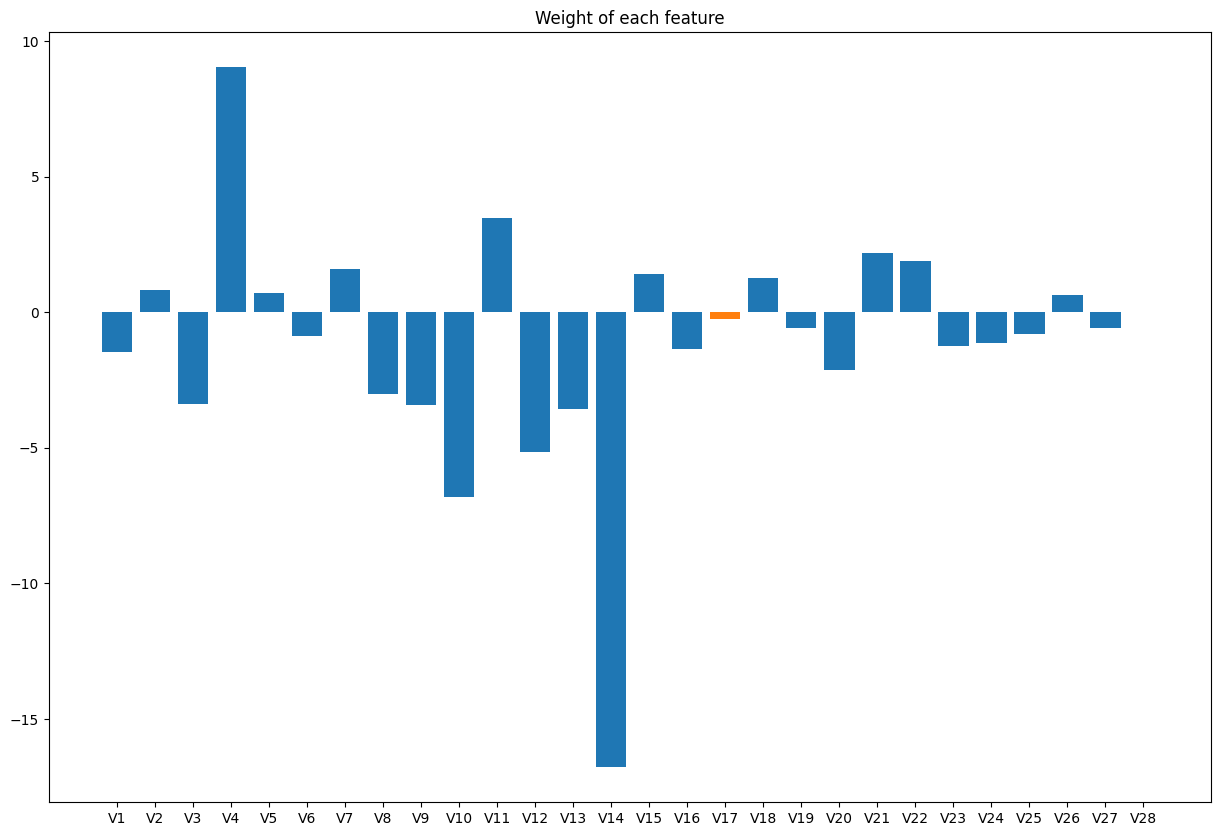

In [44]:
names = testDataset.drop(columns=['Class']).columns.values
weigths = sgd.coef_.reshape((-1,))

weigthsWithLabel = pd.Series(weigths, names)
weightsNotRelevant = weigthsWithLabel[np.abs(weigthsWithLabel) < 0.5]

plt.figure(figsize=(15, 10))
plt.title("Weight of each feature")
plt.bar(names, weigths)
plt.bar(weightsNotRelevant.index.to_list(), weightsNotRelevant.values)
plt.show

The features that are not relevant are those whose weight in the model are inside a range very close to zero and a threshold can be used to establish the limits of this range.

## Conclusion

The analises made in this project are important to practice many steps of training a neural network.

First, we have to analise the distribution of our data according to its classes and choose the best method to score the models used. Then we have to test many hyper parameters to our models and choose the ones that perform better according to the method of scoring selected. 

In order to do it, we use a method called 3-fold cross validation, which separates our data into 3 folds and do 3 rounds of training, taking the mean as the score of the model with those hyper parameters. Then, we use the best model to predict the testing data to analize its performance.

After that, we can do deeper analises, like manually choosing the class of the testing data according to the probabilites generated by the model. Another analisys is looking for the features that are important to our model using a specify neural network and looking into its weigths.